<a href="https://colab.research.google.com/github/kishan-debug/House_Price_Prediction_Using_Linear_Regression/blob/main/House_Price_Prediction_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
# prompt: import all the libraries reuired for this project

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Problem Statement

* you have been given a dataset that describes the functionality of houses. Now, based on the given features, you have to predict the house price.

# Defining a DataFrame

* Link: https://drive.google.com/file/d/1yrVwfX1LjISQ6vdR1Kaht-S1_8y2Gk6z/view?usp=sharing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project_Datasets/house_price_dataset/Housing.csv')

# EDA Exploratory Data Analysis


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# prompt: Using dataframe df: how many rows are there

len(df)


545

In [ ]:
#  how many rows are there
df.shape[0]

545

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
# prompt: what kind of dtype for all columns

df.dtypes


price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# prompt: number of unique values for each column

df.nunique()


price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# # prompt: price.      strength
# # 10             2
# # 100            3
# # 1000           4
# # how to print this for all values

# for price, strength in zip(df['price'], df['strength']):
#   print(f'price: {price}, strength: {strength}')


In [ ]:
df.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [ ]:
# Yes --> 1
# No --> 0


In [ ]:
# prompt: # Yes --> 1
# # No --> 0

df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished


In [ ]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,1,no,no,no,no,0,no,unfurnished


In [ ]:
df.mainroad.dtype

dtype('int64')

In [ ]:
df.guestroom.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.guestroom.value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [ ]:
df.guestroom.replace(['yes','no'],[1,0],inplace =True)

In [ ]:
df.guestroom.value_counts()

0    448
1     97
Name: guestroom, dtype: int64

In [ ]:
df.basement.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.basement.value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [ ]:
df.basement.replace(['yes','no'],[1,0],inplace = True)

In [ ]:
df.basement.value_counts()

0    354
1    191
Name: basement, dtype: int64

In [ ]:
df.hotwaterheating.replace(['yes','no'],[1,0],inplace = True)

In [ ]:
df.airconditioning.replace(['yes','no'],[1,0],inplace = True)

In [ ]:
df.prefarea.replace(['yes','no'],[1,0],inplace = True)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# prompt: create a for loop to convert all the yes no values of mainroad,guestroom,basement,hotwaterheating 1 and 0 respectively

# for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
#   df[col] = df[col].map({'yes': 1, 'no': 0})


In [ ]:
df.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [ ]:
df.furnishingstatus.replace(['furnished','unfurnished','semi-furnished'],[1,0,2],inplace = True)

# Observations

1. Data Strength - 545
2. Number of Random Variables -13
3. None of the columns contains Null Values
4. Columns --price area bedrooms bathrooms stories,parking, has numerical values
5. Columns -- mainroad guestroom basement hotwaterheating airconditioning, prefarea furnishingstatus , has object values

# Manipulation:
1. Changed the categorical values to numerical values for the columns (mainroad guestroom basement hotwaterheating airconditioning, prefarea furnishingstatus)

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [ ]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.190086
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.081367
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.097834
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.089418
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.043288
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.079403
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.057513
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.093425
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.069076
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.020887


<Axes: >

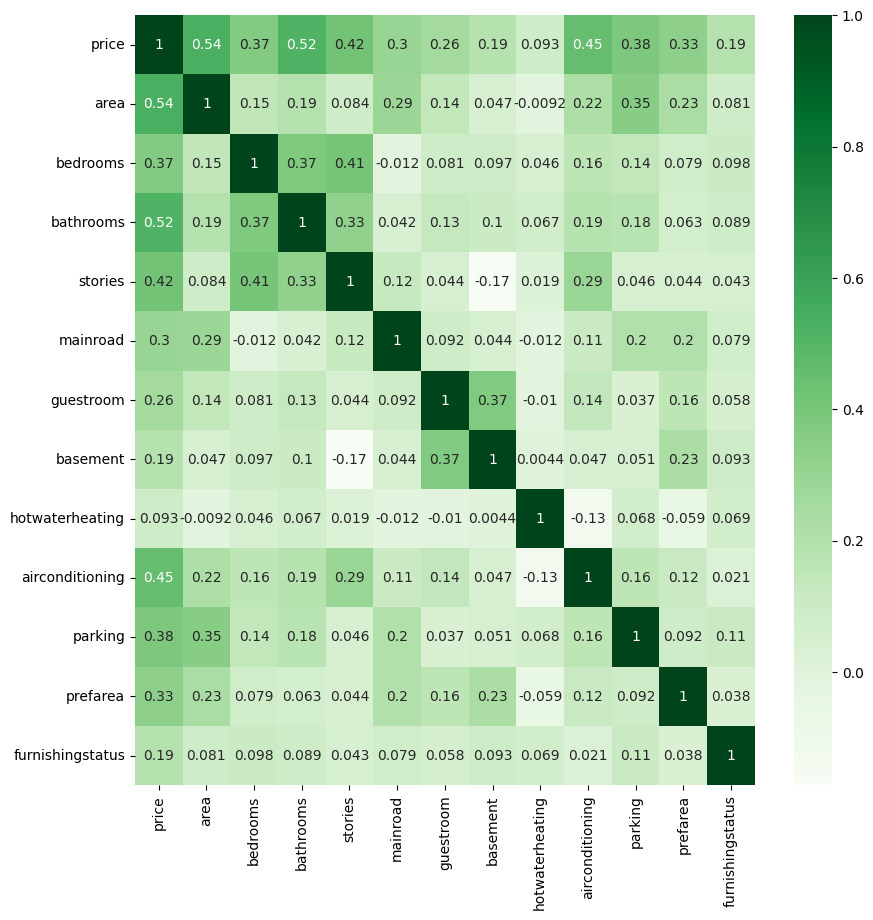

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

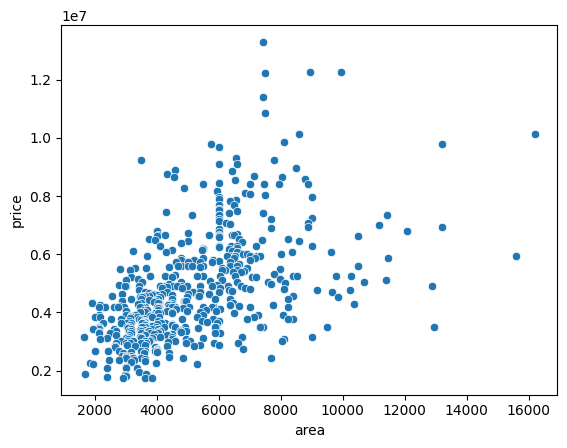

In [ ]:
# prompt: plot scatter plot of area and price

sns.scatterplot(x='area', y='price', data=df)
plt.show()


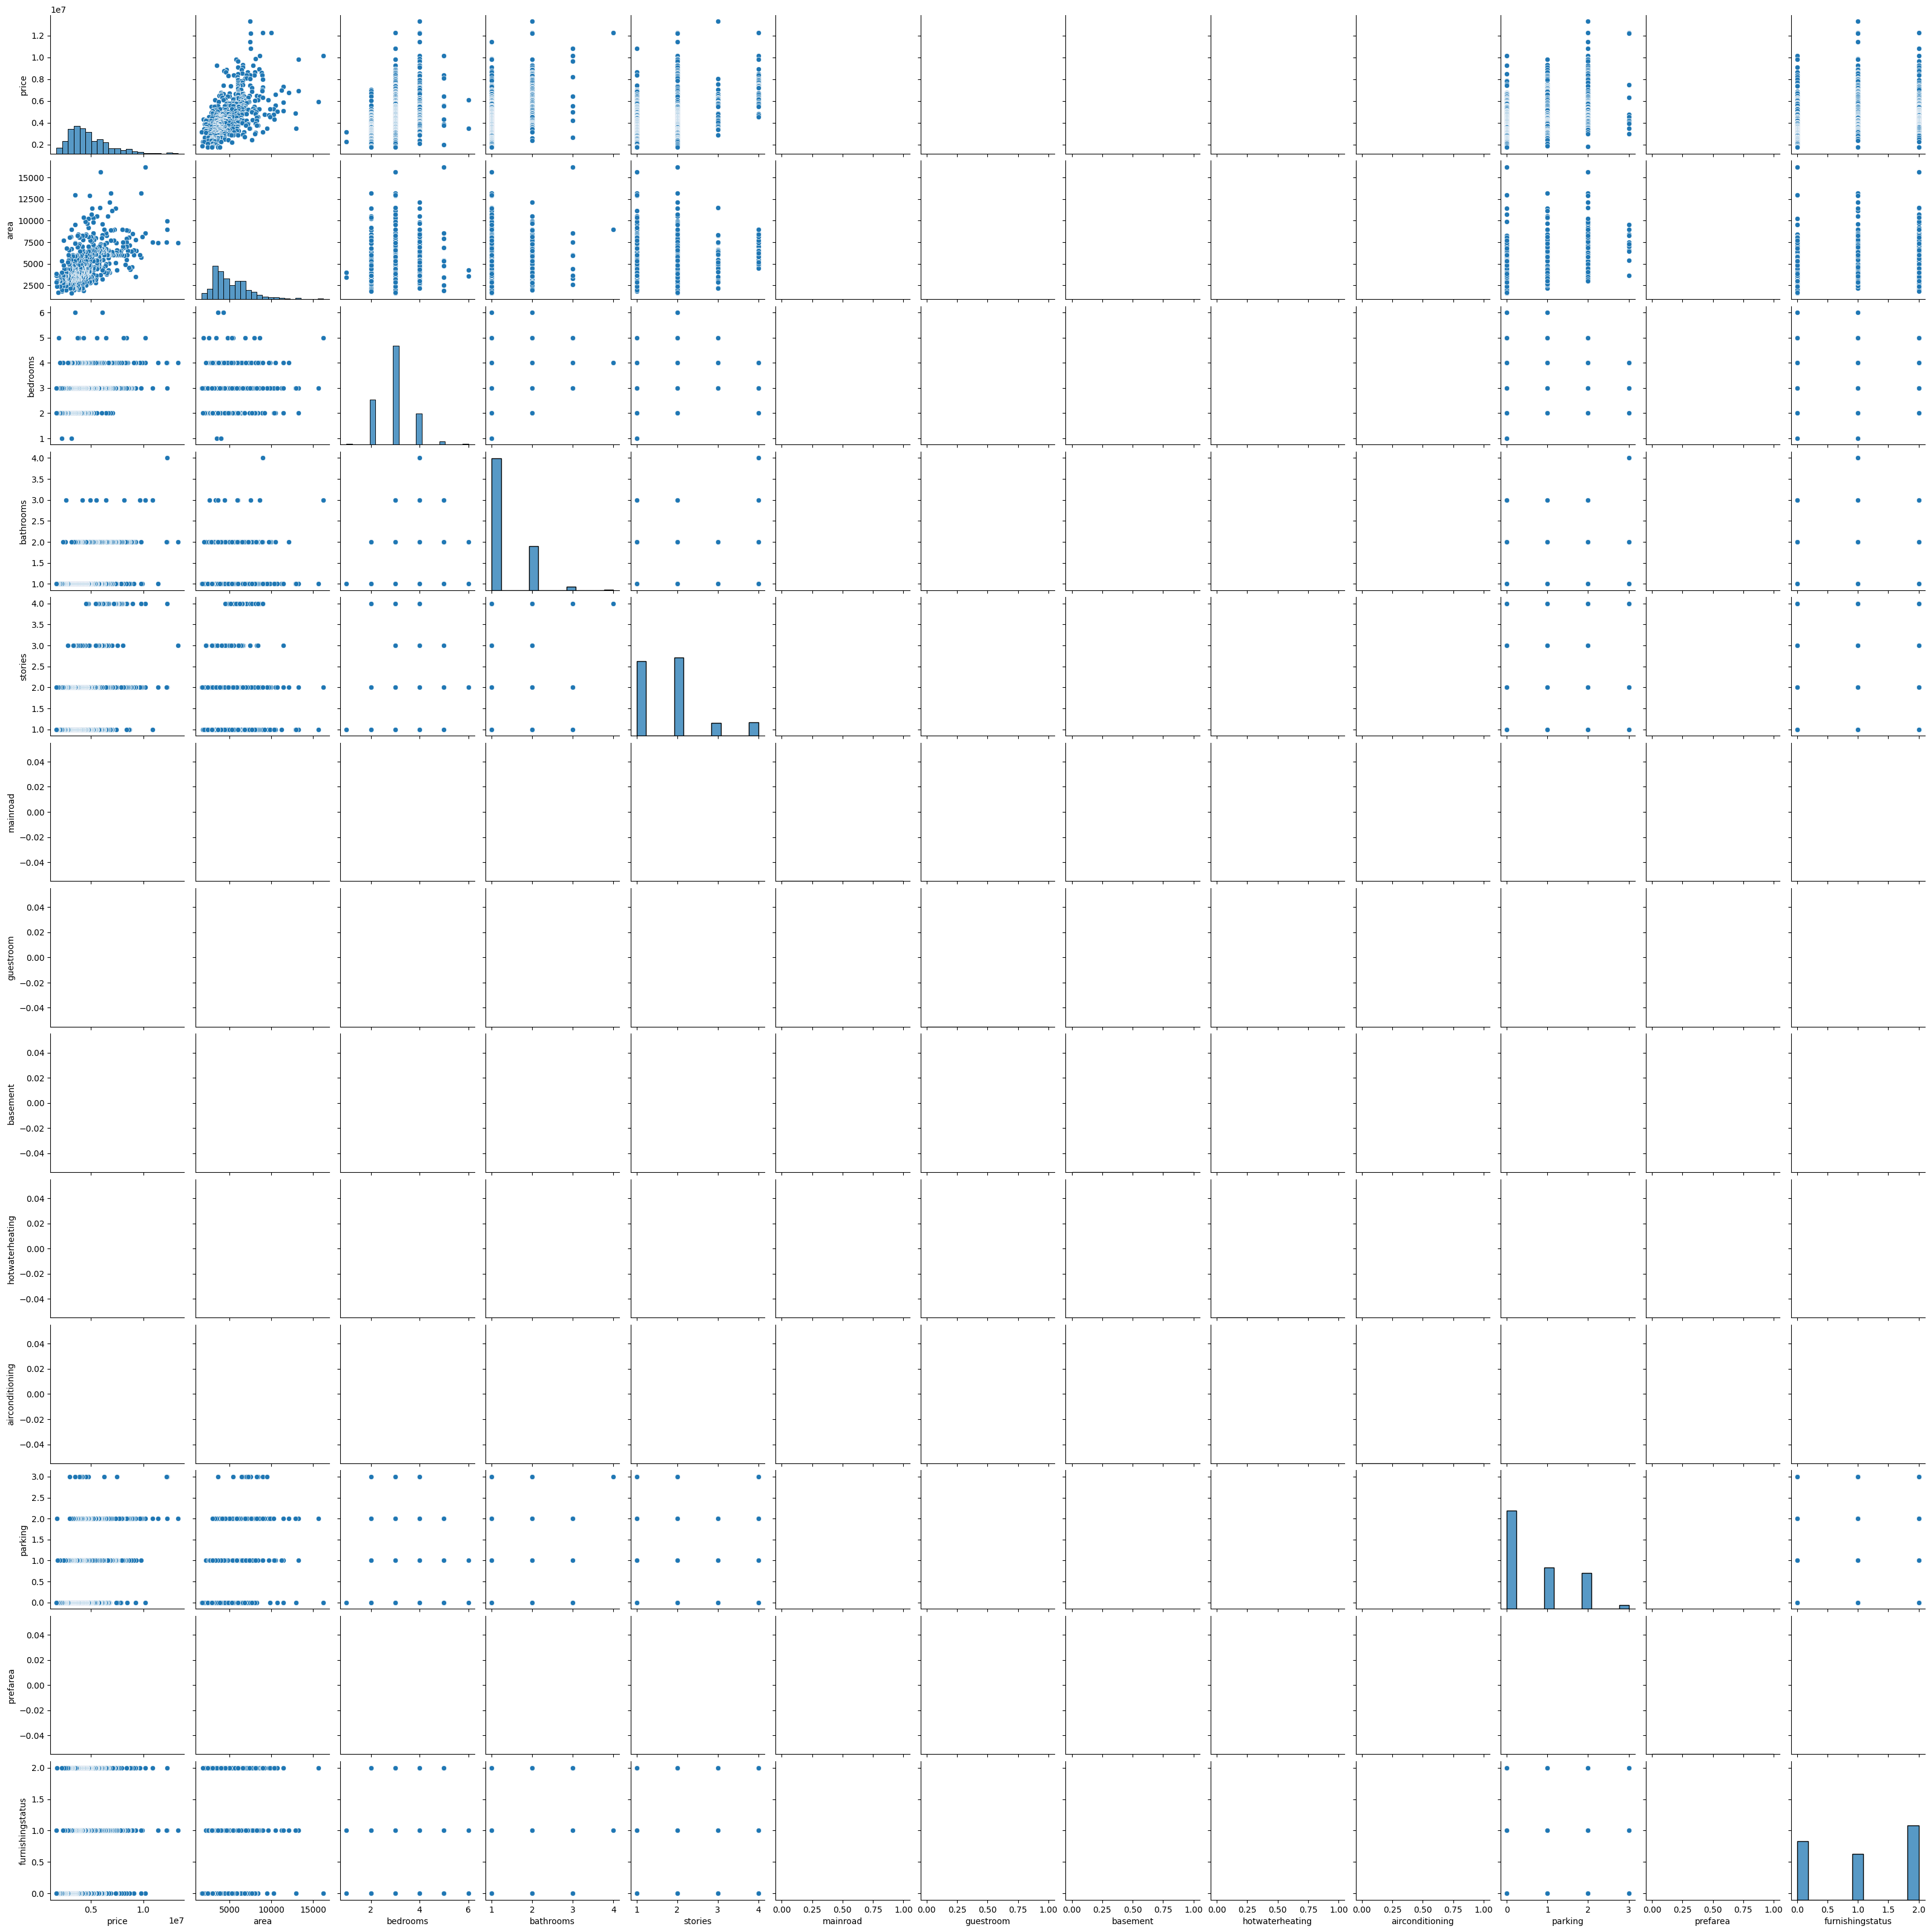

In [ ]:
sns.pairplot(df)

<Axes: >

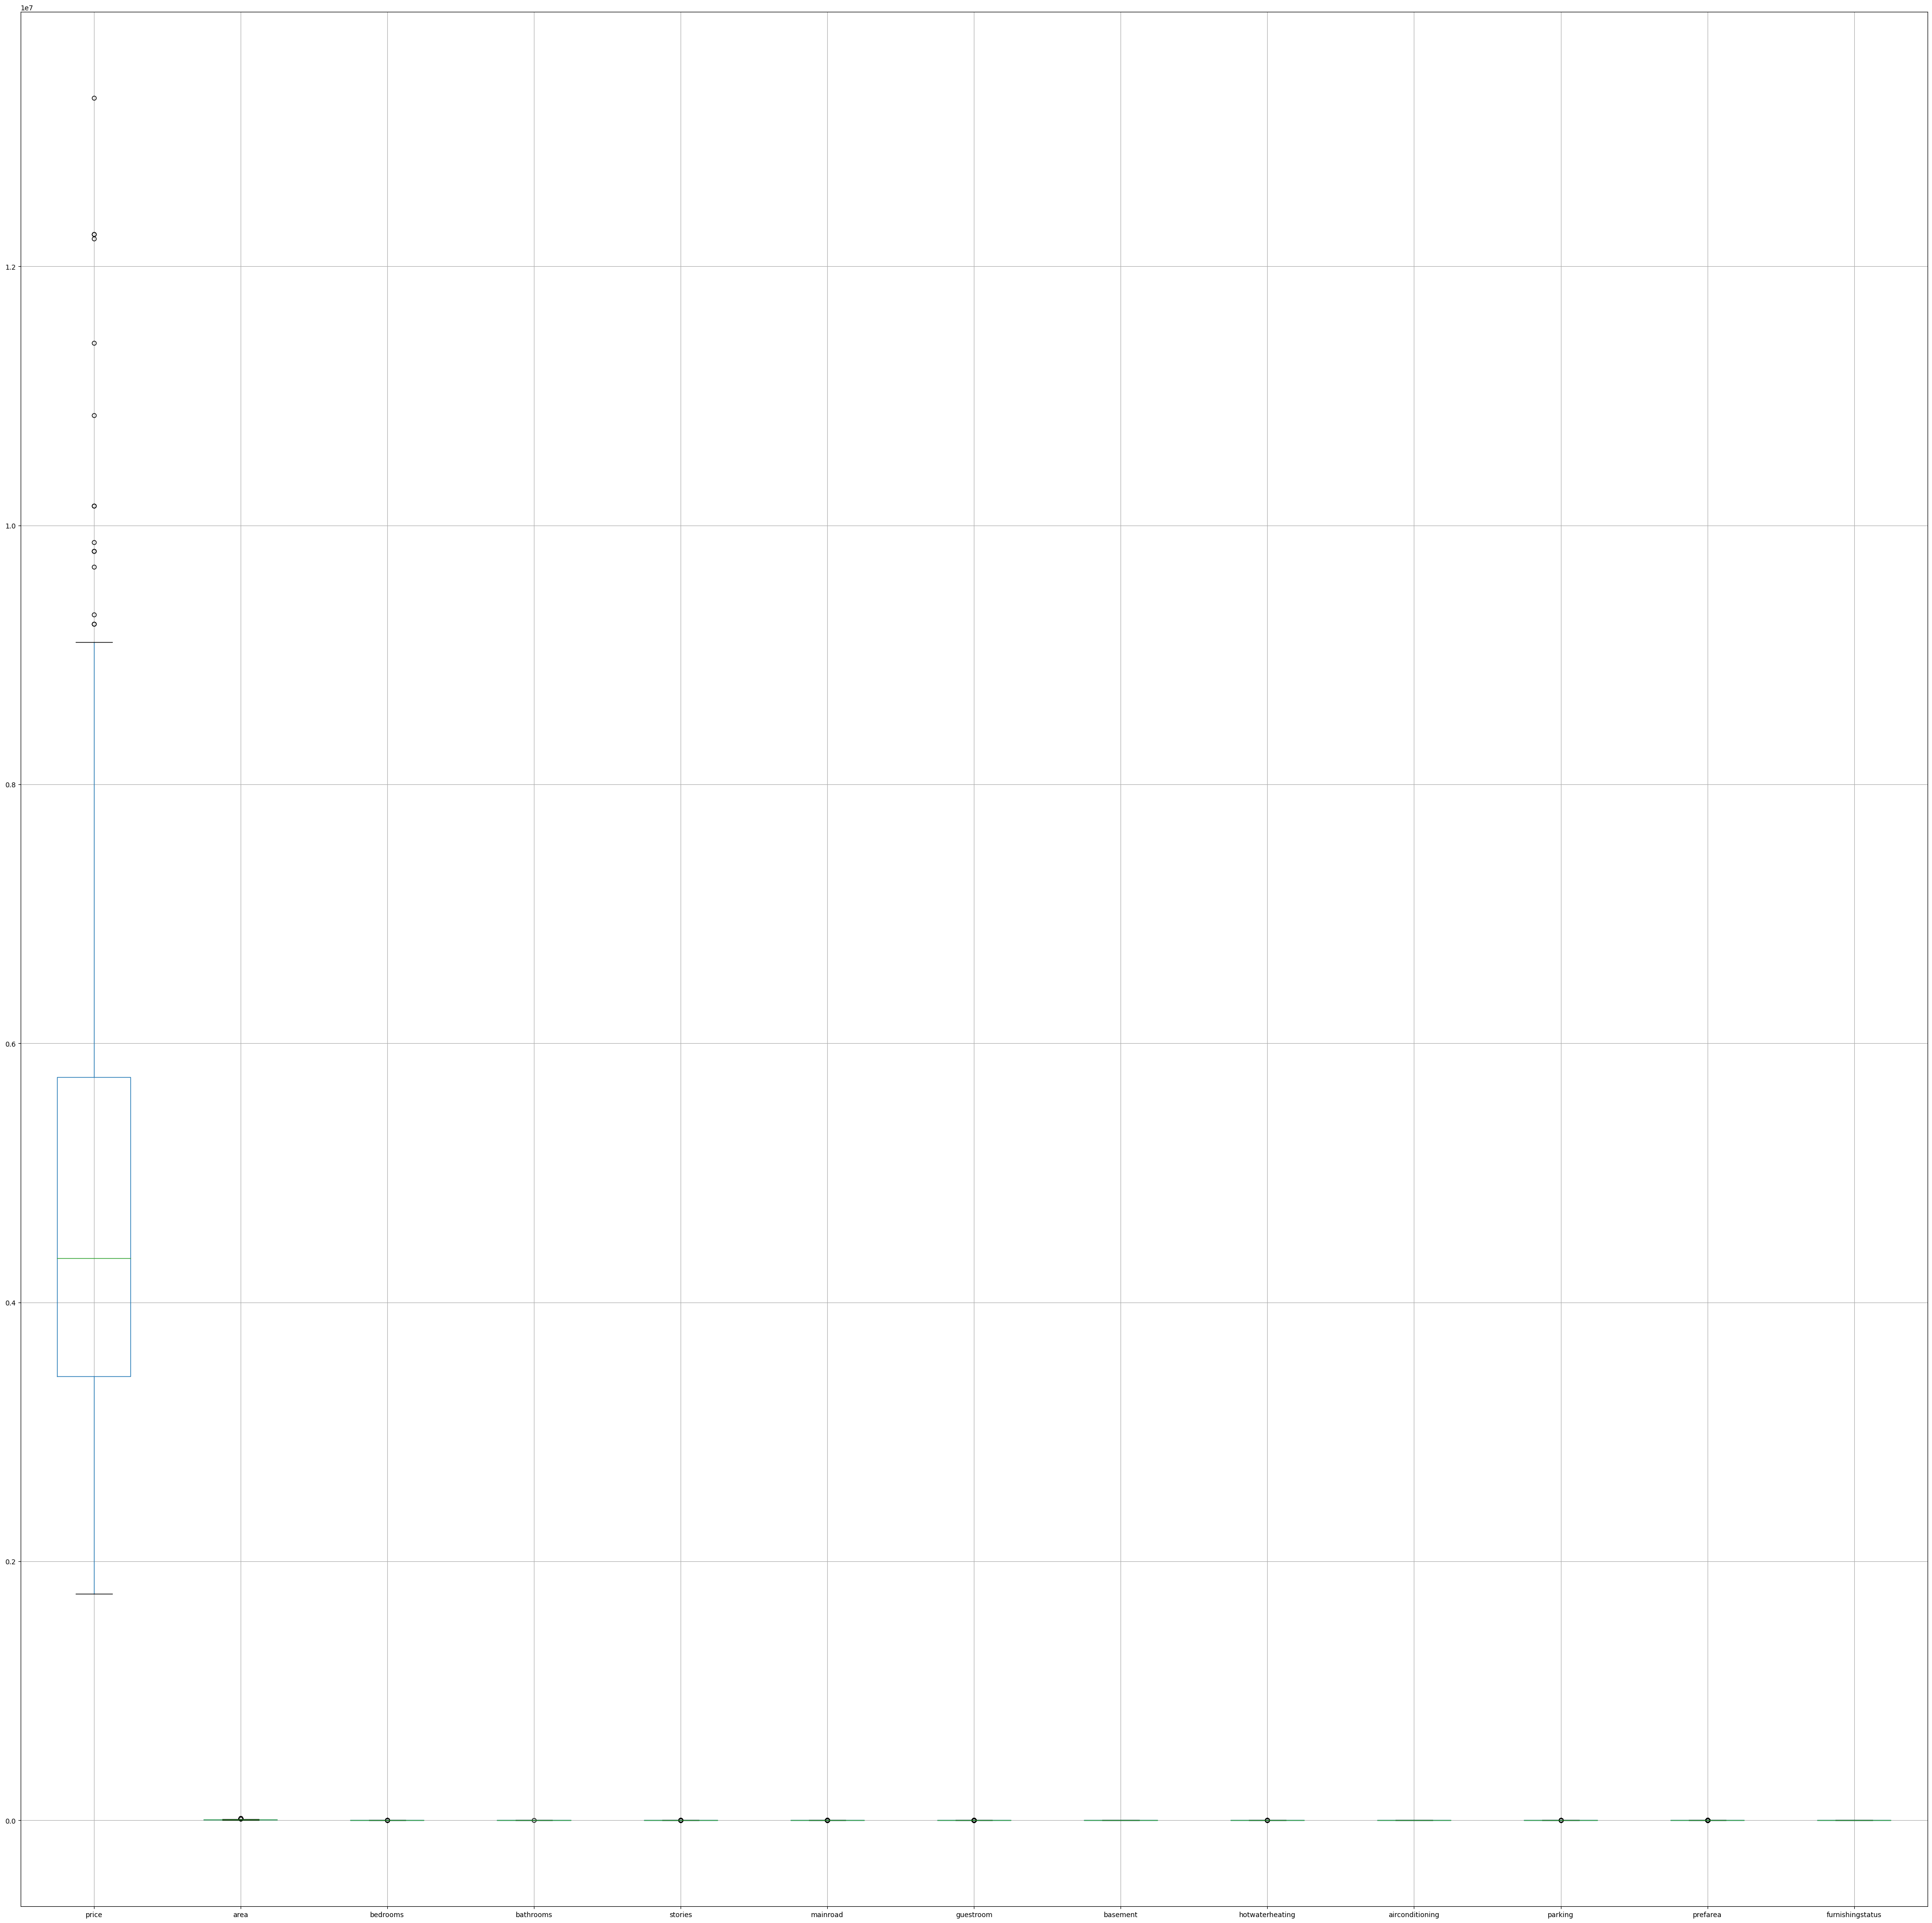

In [ ]:
plt.figure(figsize=[50,50])
df.boxplot()

<Axes: >

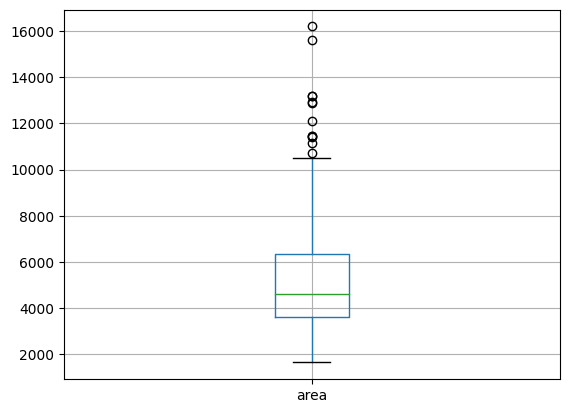

In [ ]:
df[['area']].boxplot()

<Axes: >

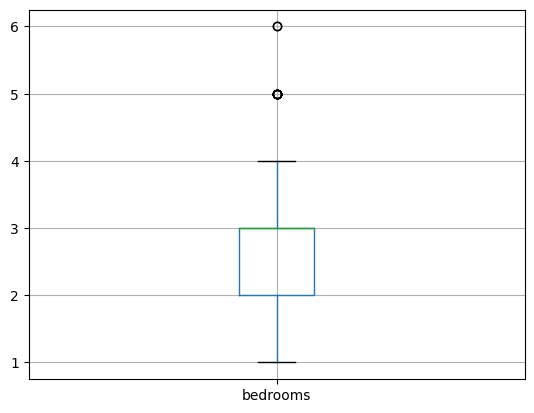

In [ ]:
df[['bedrooms']].boxplot()

In [ ]:
# prompt:  # prompt: # How many values are there where bedrooms is more than 4

df[df['bedrooms'] > 4].count()['bedrooms']


In [ ]:
len(df.bedrooms.loc[df.bedrooms > 4])

12

<Axes: >

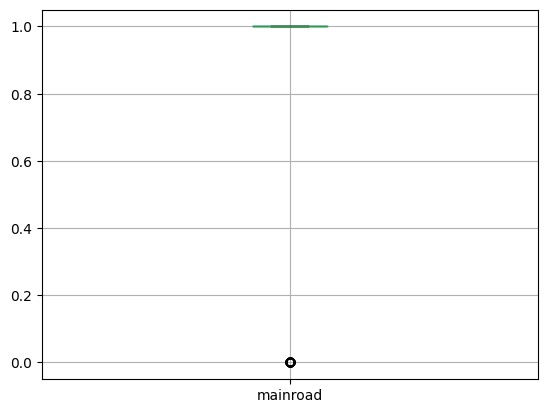

In [ ]:
df[['mainroad']].boxplot()

In [ ]:
len(df.mainroad.loc[df.mainroad == 0])

77

<Axes: xlabel='price', ylabel='Count'>

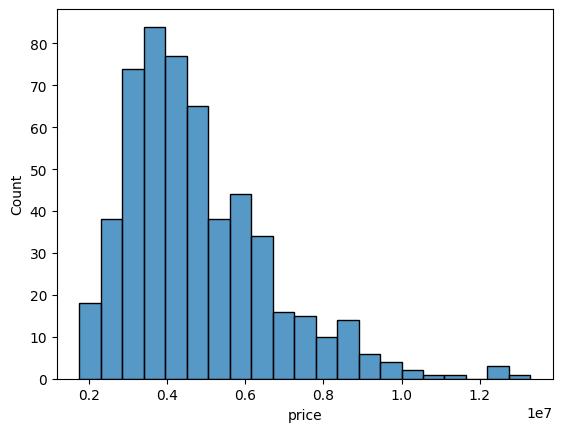

In [ ]:
sns.histplot(df.price)

<Axes: >

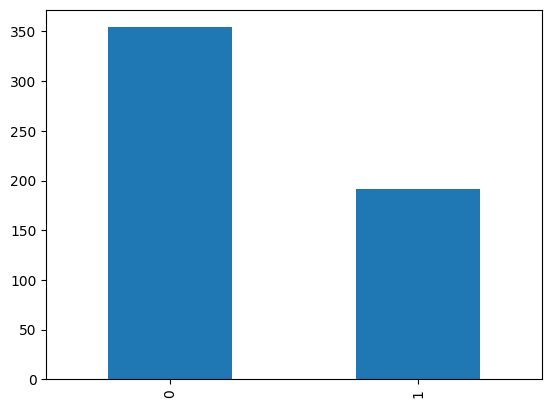

In [ ]:
df.basement.value_counts().plot.bar()

In [ ]:
#  What is the price of the house where bedrooms are 4 and bathrooms are 2?
df.loc[df.bedrooms== 4,['price','bedrooms','bathrooms'] ][ df.bathrooms==2]

<ipython-input-51-0653934e755f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[df.bedrooms== 4,['price','bedrooms','bathrooms'] ][ df.bathrooms==2]


,price,bedrooms,bathrooms
0,13300000,4,2
3,12215000,4,2
12,9310000,4,2
13,9240000,4,2
16,9100000,4,2
25,8540000,4,2
29,8400000,4,2
32,8295000,4,2
37,7980000,4,2
39,7910000,4,2


# Spliting the dataset

In [ ]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1


In [ ]:
x = df.drop('price',axis=1)
y = df.price

In [ ]:
# target has to be in 1d

df.price.ndim

1

In [ ]:
# feature must be in 2d
df.drop('price',axis=1).ndim

2

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
len(x_train)

436

In [ ]:
len(x_test)

109

In [ ]:
len(y_train)

436

In [ ]:
len(y_test)

109

# Choosing the Model

In [ ]:
model = LinearRegression()

# Fiting/Training the model

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Intercept value (Cost Function)
model.intercept_

-153020.39767693914

In [ ]:
# coefficient value
model.coef_

array([2.37359519e+02, 7.42382082e+04, 1.09878563e+06, 4.22818367e+05,
       3.99602240e+05, 2.36368961e+05, 4.13764911e+05, 6.96228583e+05,
       8.14587673e+05, 2.37846833e+05, 6.34405791e+05, 1.26914419e+05])

# Prediction

In [ ]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [ ]:
pred_y =model.predict(x_test)

In [ ]:
pred_y

array([5239173.32762718, 7054067.57583382, 3129423.54574214,
       4668932.93211896, 3057758.57376511, 3585956.42796038,
       5430399.31975463, 6182620.74176088, 2760320.64728725,
       2359083.3399644 , 9746225.66150697, 2850434.59951216,
       3214625.09528042, 3417524.84438337, 3769801.02852143,
       5309671.85335955, 3068028.49401721, 4890310.44714619,
       4453883.75758458, 3594648.20323524, 5899893.81059038,
       5963835.34944124, 2782787.13656036, 4838071.49471231,
       5330250.73959906, 7654298.4678318 , 3300237.03688317,
       5001631.29984533, 8012230.93813926, 3178473.5945452 ,
       6578529.7401813 , 3392127.35949438, 6537350.98622346,
       4237680.8829526 , 3621348.73870716, 5910621.58319738,
       4896147.52750411, 4471112.88912377, 3231897.01884388,
       4375178.05890928, 4614551.92546614, 3592864.97825681,
       7035078.81430349, 3775390.05875499, 3772667.84258209,
       4365957.52699339, 6850714.81147478, 4080980.8739274 ,
       3827406.38024767,

In [ ]:
newdf = pd.DataFrame({'Actual Value':y_test,'Predicted Value':pred_y})

In [ ]:
newdf

,Actual Value,Predicted Value
316,4060000,5.239173e+06
77,6650000,7.054068e+06
360,3710000,3.129424e+06
90,6440000,4.668933e+06
493,2800000,3.057759e+06
...,...,...
15,9100000,5.055402e+06
357,3773000,4.098018e+06
39,7910000,7.162800e+06
54,7350000,6.479294e+06


Text(0.5, 1.0, 'Actual V/s Predicted')

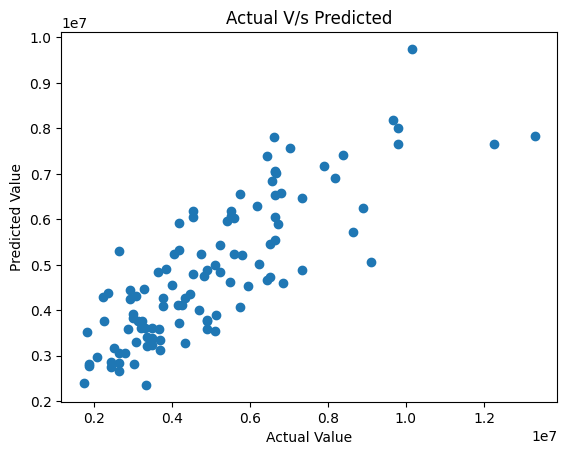

In [ ]:
plt.scatter(newdf['Actual Value'], newdf['Predicted Value'])
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual V/s Predicted')

In [ ]:
newdf.corr()

,Actual Value,Predicted Value
Actual Value,1.000000,0.822513
Predicted Value,0.822513,1.000000


<Axes: >

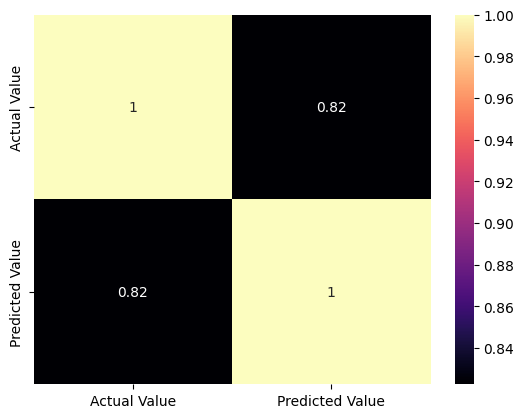

In [ ]:
sns.heatmap(newdf.corr(),annot=True,cmap='magma')

In [ ]:
a = int(input("Enter the area: "))

Enter the area: 1


In [ ]:
b = model.predict([a, ____, _____, ___])


In [ ]:
print(b)

# Testing the model performance

In [ ]:
r2_score(y_test, pred_y)

0.6542221839581839

Text(0, 0.5, 'Predicted Value')

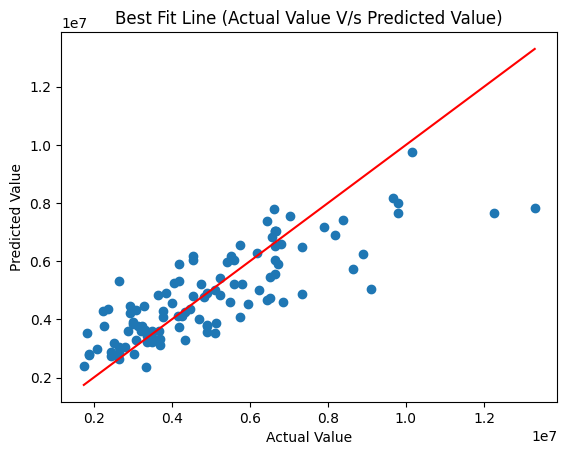

In [ ]:
plt.scatter(y_test, pred_y)
plt.plot(y,y, c='r')
plt.title('Best Fit Line (Actual Value V/s Predicted Value)')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')